# DNN Verification Project (α,β-CROWN part)

**Alireza Jafari** (1) and **Yang Yang** (2)

jrp5td@virginia.edu (1)

xqg5sq@virginia.edu (2)

Project for SE4ML



##Why do we need to verify neural networks?
Nowadays, neural networks are used in safety-critical areas, among others. As a result, there is a need to formally prove some of the network's behaviours (especially under malicious inputs). \\
One of those behaviours is the so-called **Robustness** of the network. Robustness means that small perturbations to the inputs should not lead to changes in the output of the neural network. \\

The illustration shows, for example, image recognition for an animal. On the left side, the neural network recognises a panda with a probability of 57.7%. By adding noise, a gibbon is recognised in the following with a probability of 99.3%. In this example, this wrong decision is probably not safety-critical, but other use cases (for example in the field of autonomous driving) are conceivable where such a wrong decision could have serious consequences.


##Basics on α,β-CROWN

The **α,β-CROWN verifier** is a specific type of algorithm used in the field of computer science, particularly in formal methods and software verification. This algorithm is designed to analyze and verify properties of software systems, ensuring they behave correctly and securely. Here's a detailed description of its components and functionality:

* **Algorithm Type:** α,β-CROWN is a formal verification algorithm. It belongs to a class of algorithms that mathematically prove or disprove the correctness of a system with respect to a certain formal specification or property.

* **Application Domain:** It is primarily used in verifying properties of software systems, such as correctness, safety, security, and compliance with certain standards.

* **Verification Approach:** The verifier uses a combination of symbolic execution and abstract interpretation techniques. Symbolic execution allows the algorithm to explore different program paths and states by treating inputs as symbolic values. Abstract interpretation, on the other hand, provides a way to approximate the set of all possible states a program can reach, which helps in analyzing the behavior of the system under different scenarios.

* **Alpha (α) Component:** The α component in the α,β-CROWN verifier refers to the level of abstraction it applies while analyzing the system. It abstracts away certain details of the system to simplify the verification process. This abstraction is key in handling complex systems and large codebases, where exact analysis might be computationally infeasible.

* **Beta (β) Component:** The β component represents the precision of the analysis. It determines how finely the verifier examines the behaviors and states of the system. A higher β value indicates a more detailed and precise analysis, potentially identifying more subtle bugs or issues.

* **Advantages:** The α,β-CROWN verifier is designed to balance between abstraction and precision, providing a more efficient and effective verification process. It can handle larger and more complex systems compared to traditional verifiers that might be limited by computational constraints.

* **Output:** The output of the verifier includes a report detailing whether the system meets the specified properties or not. If it does not meet the properties, the verifier provides counterexamples or scenarios where the system fails to behave as expected.

This verifier represents a sophisticated approach to ensuring software reliability and security, balancing the need for abstraction to handle complexity with the need for precision to identify subtle issues.

**Complete verification** In a complete verification setting the verifier should say "yes" or "no" to a given property of a network. \\
**α,β-CROWN**
α,β-CROWN is an open-source neural network verifier based on an efficient bound propagation algorithm and branch and bound. The code can be found on [their website](https://github.com/huanzhang12/alpha-beta-CROWN). \\
**CROWN** is a general framework to certify robustness of
neural networks with general activation functions for given input data points. The algorithm can be used for certifying NNs using linear or quadratic
upper and lower bounds for general activation functions that are not necessarily piece-wise linear.[See their paper for more information](https://arxiv.org/pdf/1811.00866.pdf). \\
**β-CROWN** is a "new bound propagation based method that can fully encode neuron splits via optimizable parameters
β constructed from either primal or dual space". [See the paper of β-CROWN for more information](https://arxiv.org/pdf/2103.06624.pdf). \\
**α-CROWN** is for incomplete verification with optimized CROWN bound. [See the paper of α-CROWN for more information](https://arxiv.org/pdf/2011.13824.pdf). \\


In this tutorial we will first go through the installation of α,β-CROWN. Then we will see some of the features and configuration options of α,β-CROWN.

## Installation

This installation is based on this [tutorial](https://colab.research.google.com/drive/1mJTOmq2qHxMycHUzBepBN47QWcxda3ov#scrollTo=Y0toepwVIFTG).

In [ ]:
%%capture
%%bash
%env PYTHONPATH=
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
%%capture
%%bash
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes

In [ ]:
%%capture
import sys
sys.path
!ls /usr/local/lib/python3.7/dist-packages
_ = (sys.path
        .append("/usr/local/lib/python3.7/site-packages"))

In [ ]:
%%capture
# Uninstall existing Pytorch on Colab, which might be incompatible or buggy.
# Note that the alpha beta crown library is tested on Pytorch 1.8.2 LTS, and other versions might be incompatible.(according to reference tutorial)
# !pip uninstall --yes torch torchvision torchaudio torchtext
!git clone https://github.com/huanzhang12/alpha-beta-CROWN.git

In [ ]:
# this part will take about 10 mins
%%capture
%%bash
# Remove the old environment, if necessary.
conda env remove --name alpha-beta-crown
conda env create -f alpha-beta-CROWN/complete_verifier/environment.yaml --name alpha-beta-crown # install all dependents into the alpha-beta-crown environment

In [ ]:
%cd alpha-beta-CROWN
!rm -r auto_LiRPA
%cd complete_verifier
!rm auto_LiRPA
!git clone https://github.com/Verified-Intelligence/auto_LiRPA
!mv auto_LiRPA auto_LiRPA_extra
%cd auto_LiRPA_extra
!mv auto_LiRPA ../
%cd ..
!rm -rf auto_LiRPA_extra

/content/alpha-beta-CROWN
/content/alpha-beta-CROWN/complete_verifier
Cloning into 'auto_LiRPA'...
remote: Enumerating objects: 811, done.
remote: Counting objects: 100% (440/440), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 811 (delta 247), reused 355 (delta 197), pack-reused 371
Receiving objects: 100% (811/811), 31.82 MiB | 33.25 MiB/s, done.
Resolving deltas: 100% (406/406), done.
/content/alpha-beta-CROWN/complete_verifier/auto_LiRPA_extra
/content/alpha-beta-CROWN/complete_verifier


## Bank Marketing dataset


The **Bank Marketing dataset**, which forms the basis of this analysis, is a comprehensive collection of data related to direct marketing campaigns of a banking institution. The dataset comprises 11,162 entries, each representing individual client information and their response to the marketing campaign. Here is a detailed description of the dataset and its attributes:

**Data Attributes**: The dataset contains 17 columns, representing various attributes of the clients and the marketing campaign. These attributes are:

* age: The age of the client.
* job: Type of job of the client.
* marital: Marital status of the client.
* education: Education level of the client.
* default: Indicates if the client has credit in default.
* balance: Average yearly balance, in euros, of the client.
* housing: Indicates if the client has a housing loan.
* loan: Indicates if the client has a personal loan.
* contact: Type of communication used for contacting the client.
* day: The last contact day of the month.
* month: The last contact month of the year.
* duration: Last contact duration, in seconds.
* campaign: Number of contacts performed during this campaign for this client.
* pdays: Number of days that passed by after the client was last contacted from a previous campaign.
* previous: Number of contacts performed before this campaign for this client.
* poutcome: Outcome of the previous marketing campaign.
* **deposit**: Indicates if the client has subscribed to a term deposit.

**Data Types:** The dataset comprises both numerical and categorical variables. Numerical variables include age, balance, day, duration, campaign, pdays, and previous. Categorical variables include job, marital, education, default, housing, loan, contact, month, poutcome, and deposit.

**Objective of Analysis:** The primary goal of analyzing this dataset is to understand the factors influencing a client's decision to subscribe to a term deposit. This involves examining relationships between the client's demographic attributes, financial background, and their response to the marketing campaign.




In [ ]:
%%capture
!git clone https://github.com/alireza-jafari/bank.git

In [ ]:
import pandas as pd
data = pd.read_csv('./bank/bank.csv')
print(data)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

# Preprocessing dataset

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing
X = data.drop('deposit', axis=1)
y = data['deposit'].map({'yes': 1, 'no': 0})  # Convert to binary

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
num_features = X_processed.shape[1]
print(X_processed.shape)
X_reshaped = np.reshape(X_processed, newshape=(-1, 1, 1, num_features))

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Change to long type
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Change to long type

train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)



(11162, 51)


# CNN and MLP Models


**Convolutional Neural Network**

The Convolutional Neural Network (CNN) model presented here is a specialized kind of neural network particularly adept at processing data with a grid-like topology, such as images. This model initiates with a convolutional layer (conv1) that transforms the input feature map with a specified number of features (num_features) into a 16-channel feature map using a kernel of size (1, num_features). This transformation is conducive to capturing spatial hierarchies in data by applying convolutions, allowing the model to efficiently handle high-dimensional input such as images. The second convolutional layer (conv2) further processes the data, expanding the depth to 32 channels. Each convolutional layer is followed by a ReLU (Rectified Linear Unit) activation function (relu1 and relu2), which introduces non-linear properties to the model, enabling it to learn more complex patterns. The model culminates in a flattening operation and a fully connected layer (fc), transforming the 2D feature maps into a flat vector for classification, making it suitable for binary classification tasks.

**Multi-Layer Perceptron**

In contrast, the Multi-Layer Perceptron (MLP) model is a type of feedforward artificial neural network that consists of multiple layers of perceptrons, making it suitable for a wide range of applications, from simple to complex. This particular MLP has three hidden layers (fc1, fc2, fc3), each followed by a ReLU activation function (relu1, relu2, relu3). The number of neurons in each layer progressively decreases (128, 64, and 32 neurons respectively), a common architecture in deep learning which allows the network to gradually distill features and patterns from the input data. The final layer (fc4) is a fully connected layer that maps the output of the last hidden layer to the desired output size, in this case, two units for binary classification. This architecture is effective in capturing and learning patterns from non-spatial, structured data, making MLPs versatile for tasks such as regression, classification, and even feature extraction.

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class CNN(nn.Module):
    def __init__(self, num_features):
        super(CNN, self).__init__()
        # Define the first hidden layer
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(1, num_features), stride=1)
        self.relu1 = nn.ReLU()
        # Define the second hidden layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=1, stride=1)
        self.relu2 = nn.ReLU()
        # Define the output layer
        self.fff = nn.Flatten()
        self.fc = nn.Linear(32, 2)  # Output layer for 2 classes

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.fff(x)
        x = self.fc(x)
        return x

class MLP(nn.Module):
    def __init__(self, num_features):
        super(MLP, self).__init__()
        # Define the first hidden layer
        self.fc1 = nn.Linear(num_features, 128)
        self.relu1 = nn.ReLU()
        # Define the second hidden layer
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        # Define the third hidden layer
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        # Define the output layer
        self.fc4 = nn.Linear(32, 2)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x


model = CNN(num_features)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model_with_accuracy(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Labels are now class indices
            loss.backward()
            optimizer.step()

            predicted = outputs.argmax(dim=1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            total_loss += loss.item()

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = correct_predictions / total_predictions
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Labels are now class indices

            predicted = outputs.argmax(dim=1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)
    avg_acc = correct_predictions / total_predictions
    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {avg_acc:.4f}')

train_model_with_accuracy(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader, criterion)


torch.save(model.state_dict(), 'models/model.pth')

Epoch [1/10], Loss: 0.5552, Accuracy: 0.7331
Epoch [2/10], Loss: 0.4088, Accuracy: 0.8284
Epoch [3/10], Loss: 0.3855, Accuracy: 0.8366
Epoch [4/10], Loss: 0.3805, Accuracy: 0.8383
Epoch [5/10], Loss: 0.3759, Accuracy: 0.8362
Epoch [6/10], Loss: 0.3722, Accuracy: 0.8414
Epoch [7/10], Loss: 0.3613, Accuracy: 0.8426
Epoch [8/10], Loss: 0.3630, Accuracy: 0.8459
Epoch [9/10], Loss: 0.3582, Accuracy: 0.8494
Epoch [10/10], Loss: 0.3485, Accuracy: 0.8522
Test Loss: 0.3658, Test Accuracy: 0.8400


In [ ]:
!rm -rf ./custom/custom_model_data.py
!mv -f ./bank/custom_model_data.py ./custom/custom_model_data.py

In [ ]:


# Load the state dictionary
state_dict = torch.load('models/model.pth')
new_state_dict = {}

# Define the mapping from old keys to new keys
key_map = {
    'conv1.weight': '0.weight',
    'conv1.bias': '0.bias',
    'conv2.weight': '2.weight',
    'conv2.bias': '2.bias',
    'fc.weight': '5.weight',
    'fc.bias': '5.bias',
}

# Rename the keys
for old_key in state_dict.keys():
    if old_key in key_map:
        new_key = key_map[old_key]
        new_state_dict[new_key] = state_dict[old_key]

torch.save(new_state_dict, 'models/updated_model.pth')


def CNN_Bank(in_channel, out_dim):
    model = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=(1, in_channel), stride=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, kernel_size=1, stride=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(32, out_dim),
    )
    return model

def Bank_dataset(spec):
    eps = spec["epsilon"]
    assert eps is not None
    database_path = './bank/bank.csv'  # path to your bank dataset


    # Load the data
    data = pd.read_csv(database_path)

    # Separate features and target
    X = data.drop('deposit', axis=1)  # Assuming 'deposit' is the target column
    y = data['deposit'].map({'yes': 1, 'no': 0})  # Convert to binary

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Apply the preprocessing to the dataset
    X_processed = preprocessor.fit_transform(X)

    # Convert to PyTorch tensors and add channel and height dimensions
    X_tensor = torch.tensor(X_processed, dtype=torch.float32).unsqueeze(1).unsqueeze(2)
    labels_tensor = torch.tensor(y.values, dtype=torch.long)

    # Create a DataLoader
    dataset = TensorDataset(X_tensor, labels_tensor)
    testloader = DataLoader(dataset, batch_size=1000, shuffle=False)

    X, labels = next(iter(testloader))

    # Adjust shapes for data_max and data_min
    data_max = (X + eps).unsqueeze(1).unsqueeze(2)
    data_min = (X - eps).unsqueeze(1).unsqueeze(2)

    # Rescale epsilon and adjust shape
    ret_eps = eps * torch.ones_like(X[0]).unsqueeze(0).unsqueeze(0)

    return X, labels, data_max, data_min, ret_eps

## Property definition

Adversarial attacks in the below scenario would involve slightly altering the 'age' (also can run for other features) input data in a way that is imperceptible or seems reasonable to a human, but could potentially lead the model to make incorrect predictions or classifications. The concept of robustness here is especially significant because 'age' can be a sensitive and influential feature in many models, particularly those in sectors like finance, banking, or insurance, where age can significantly impact decisions.

In the provided configuration for the α,β-CROWN verifier, we see parameters that specifically address this challenge:

* **Epsilon (epsilon):** This parameter defines the size of the perturbations allowed for the 'age' feature. In this case, a value of 0.11 indicates that the input age can be altered by this factor, and the model's ability to handle such changes is assessed. The perturbation is normalized, implying it's relative to the feature's scale and distribution.

* **Robustness Type (robustness_type):** The setting 'verified-acc' suggests that the verifier is focusing on ensuring that the model's accuracy remains high, even when the 'age' feature is subjected to these controlled perturbations.

* **Attack Strategy:** With settings like pgd_steps and pgd_restarts, the configuration defines a robust adversarial attack strategy. This means the model will be tested against a series of methodical and iterative attacks (PGD - Projected Gradient Descent) to assess how well it can withstand and correctly process inputs where the 'age' feature has been subtly modified.

# α,β-CROWN Verifier Configuration Description

## General Configuration
- `device`: Set to `cpu`, indicating the computations are to be performed on the CPU.
- `complete_verifier`: The type of complete verification method used. Options include `bab` (branch and bound with beta-CROWN or GCP-CROWN), `mip` (mixed integer programming formulation), and `bab-refine` (branch and bound with intermediate layer bounds computed by MIP).
- `enable_incomplete_verification`: A boolean value (`true`) indicating whether to enable or disable the initial alpha-CROWN incomplete verification. Disabling can save GPU memory.

## Model Settings
- `name`: Specifies a customized model (`custom_model_data`, `CNN_Bank`) with `in_channel=51` and `out_dim=2`.
- `path`: Path to the model file (`models/updated_model.pth`), indicating the location of the trained model.

## Data Configuration
- `start`: Indicates the starting index (`0`) for processing properties in the dataset.
- `end`: Specifies the ending index (`1`), processing up to the (i-1)-th property.
- `dataset`: Customized dataset configuration (`custom_model_data`, `Bank_dataset`).
- `num_outputs`: The number of output classes, set to `2`.

## Specification Details
- `norm`: Specifies the norm type, here `.inf` for infinity norm.
- `epsilon`: Perturbation size (`0.11`) for the input, particularly for normalized age changes.
- `robustness_type`: Set to `verified-acc`, focusing on verified accuracy under adversarial conditions.

## Solver Configuration
- `batch_size`: The size of the batch for processing, set to `1`.
- `alpha-crown`:
  - `iteration`: Number of iterations (`10`) for the α-CROWN process.
  - `lr_alpha`: Learning rate (`0.1`) for alpha in α-CROWN, with the default typically being adequate.

## Attack Parameters
- `pgd_steps`: Number of steps (`100`) for Projected Gradient Descent (PGD) attack, used to filter non-robust data examples before verification.
- `pgd_restarts`: Number of restarts (`100`) for the PGD attack, increasing this strengthens the attack.
- `attack_mode`: Set to `diverse_pgd`, indicating a variant of PGD.
- `pgd_order`: The order of PGD attack, set to `before` indicating it occurs before the verification process.


In [ ]:
%%writefile exp_configs/my_example_config.yaml
general:
  device: cpu
  complete_verifier: bab  # Complete verification verifier. "bab": branch and bound with beta-CROWN or GCP-CROWN; "mip": mixed integer programming (MIP) formulation; "bab-refine": branch and bound with intermediate layer bounds computed by MIP.
  enable_incomplete_verification: true  # Enable/Disable initial alpha-CROWN incomplete verification (disable this can save GPU memory).
model:
  name: Customized("custom_model_data", "CNN_Bank", in_channel=51, out_dim=2)
  path: models/updated_model.pth
data:
  start: 0  # Start from the i-th property in specified dataset.
  end: 1  # End with the (i-1)-th property in the dataset.
  dataset: Customized("custom_model_data", "Bank_dataset")
  num_outputs: 2
specification:
  norm: .inf
  epsilon: 0.11 # Perturbation size for the input (normalized age changes)
  robustness_type: verified-acc
solver:
  batch_size: 1
  alpha-crown:
    iteration: 10
    lr_alpha: 0.1    # Learning rate for alpha in alpha-CROWN. The default (0.1) is typically ok.
attack:  # Currently attack is only implemented for Linf norm.
  pgd_steps: 100  # Increase for a stronger attack. A PGD attack will be used before verification to filter on non-robust data examples.
  pgd_restarts: 100  # Increase for a stronger attack.
  attack_mode: diverse_pgd
  pgd_order: before

Overwriting exp_configs/my_example_config.yaml


In [ ]:
%%writefile run.sh
source activate alpha-beta-crown
python abcrown.py --config exp_configs/my_example_config.yaml
conda deactivate

Overwriting run.sh


In [ ]:
!chmod 777 run.sh
!./run.sh

/usr/local/envs/alpha-beta-crown/lib/python3.9/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/envs/alpha-beta-crown/lib/python3.9/site-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Configurations:

general:
  device: cpu
  seed: 100
  conv_mode: patches
  deterministic: false
  double_fp: false
  loss_reduction_func: sum
  sparse_alpha: true
  sparse_interm: true
  save_adv_example: false
  eval_adv_example: false
  show_adv_example: false
  precompile_jit: false
  complete_ve

**Increasing the epsilon value (ε)** in the context of adversarial attacks, particularly for neural network models, has significant implications:

1. Larger Perturbations: Epsilon (ε) typically represents the magnitude of the perturbation allowed on the input features. A higher ε value means that the adversarial attack can introduce larger changes to the input data. In practical terms, if you're dealing with a feature like 'age', a higher ε allows for a greater alteration of the age value.

2. More Noticeable Changes: With a small epsilon, perturbations might be subtle and imperceptible, but as ε increases, these changes become more noticeable. This could potentially make the adversarial examples less realistic, especially if the perturbation goes beyond what would be considered normal variation in the data.

3. Potentially Reduced Model Accuracy: A larger epsilon can make it more challenging for the model to maintain accuracy. Since the perturbations are more significant, the model might struggle to correctly classify or predict based on these altered inputs, revealing vulnerabilities in its ability to generalize from the training data.

4. Increased Robustness Testing: A higher value of ε provides a more stringent test of the model's robustness. It simulates a scenario where the model faces more extreme adversarial conditions, which is crucial for understanding the limits of the model's performance in adversarial settings.




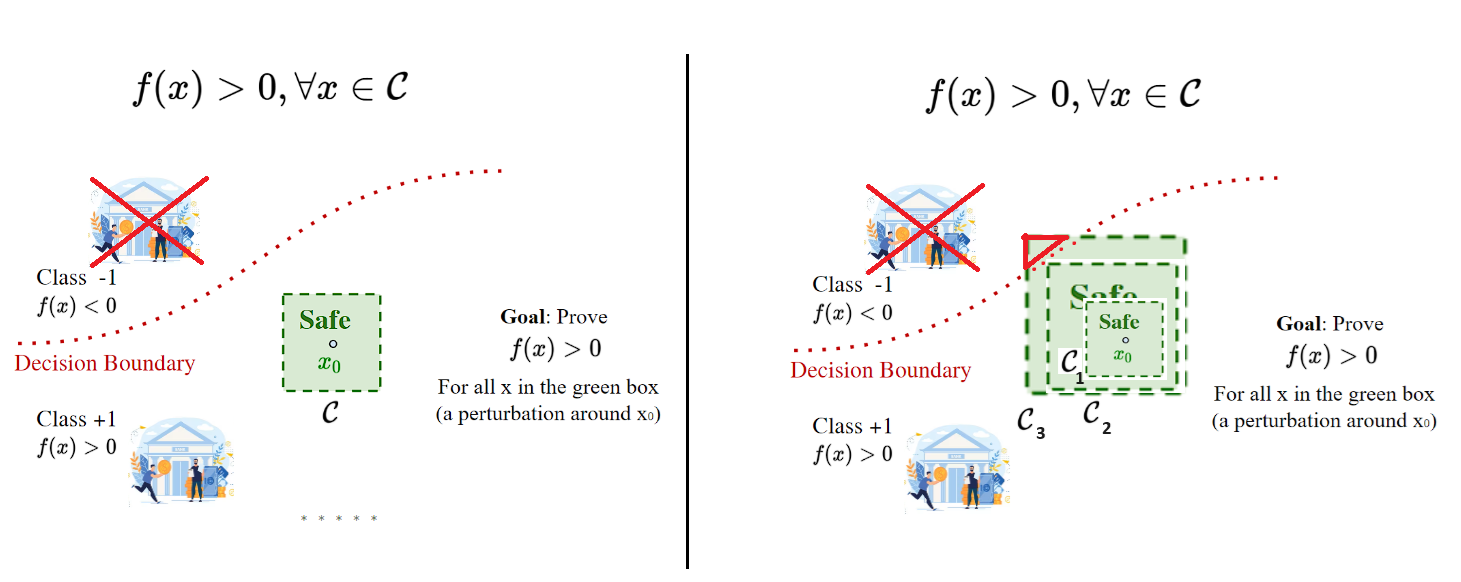




**Increasing the epsilon value (ε) in the context of verification using techniques like the α,β-CROWN verifier can indeed impact the results of the verification process, potentially leading to what might be perceived as 'falsifying' the results. Here's how a higher epsilon value affects the verification outcome:**

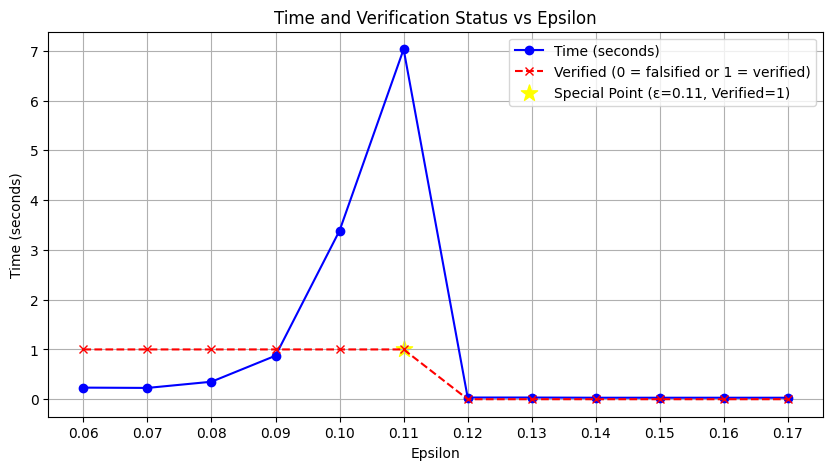

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the data
data = {
    'verified': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    'time': [0.233, 0.227, 0.3513, 0.874, 3.387, 7.03, 0.034, 0.034, 0.03, 0.03, 0.03, 0.03],
    'epsilon': [0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]
}

df = pd.DataFrame(data)

# Plotting both time vs epsilon and verified vs epsilon on the same graph
plt.figure(figsize=(10, 5))

# First line chart for time vs epsilon
plt.plot(df['epsilon'], df['time'], label='Time (seconds)', color='blue', marker='o')

# Second line chart for verified vs epsilon on the same plot
plt.plot(df['epsilon'], df['verified'], label='Verified (0 = falsified or 1 = verified)', color='red', linestyle='--', marker='x')

# Adding a yellow star marker at epsilon = 0.11 and verified = 1
plt.scatter(0.11, 1, color='yellow', marker='*', s=150, label='Special Point (ε=0.11, Verified=1)')


# Adding titles and labels
plt.title('Time and Verification Status vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Time (seconds)')

# Set x-axis to show each epsilon value
plt.xticks(df['epsilon'])

# Adding grid for better readability
plt.grid(True)

# Adding a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()


# **Fairness property by α,β-CROWN Verifier**

# α,β-CROWN Verifier: Functionality and Limitations in Fairness Assessment

## Core Functionality of α,β-CROWN Verifier

The α,β-CROWN verifier is primarily designed for **robustness verification** against adversarial attacks in neural network models. Key aspects include:

1. **Adversarial Attack Robustness**: Assessing the model's resistance to input perturbations aimed at misleading it.
2. **Advanced Verification Techniques**: Utilizing branch and bound methods combined with beta-CROWN or GCP-CROWN for efficient analysis.
3. **Lp-Norm Perturbations**: Defining the size and shape of allowable input perturbations using Lp-norms.
4. **Alpha-CROWN Incomplete Verification**: An optimization-based approach for rapid output bounds estimation.

## Fairness Assessment in Machine Learning

Fairness in machine learning entails ensuring unbiased treatment of inputs, particularly regarding sensitive attributes such as gender, race, or age. Key components for fairness assessment tools include:

1. **Fairness Metrics**: Tools designed for fairness evaluation often employ metrics like demographic parity, equality of opportunity, or predictive equality.
2. **Sensitive Attributes Analysis**: Directly examining the impact of sensitive attributes on model predictions.
3. **Bias Mitigation**: Implementing strategies to adjust training or model outputs to reduce identified biases.

## Limitation of α,β-CROWN for Fairness

Despite its proficiency in robustness verification, the α,β-CROWN verifier is not tailored for fairness assessment:

- The verifier's architecture is focused on adversarial robustness, lacking direct mechanisms for evaluating fairness-related issues like bias against sensitive attributes.
- Using the verifier to indirectly assess aspects of fairness (such as the influence of perturbations in sensitive attributes on model outputs) does not align with standard practices in fairness assessment.


In [ ]:
%%writefile exp_configs/my_fairness_config.yaml
general:
  device: cpu
  complete_verifier: fairness  # Hypothetical fairness verifier.
  enable_incomplete_verification: true  # Enable/Disable initial alpha-CROWN incomplete verification (disable this can save GPU memory).

model:
  name: Customized("custom_model_data", "CNN_Bank", in_channel=51, out_dim=2)
  path: models/updated_model.pth

data:
  start: 0  # Start from the i-th property in specified dataset.
  end: 1  # End with the (i-1)-th property in the dataset, sensitive_attributes, like 'gender', 'race'.
  dataset: Customized("custom_model_data", "Bank_dataset")
  num_outputs: 2

specification:
  type: lp
  robustness_type: verified-acc
  norm: .inf
  epsilon: 0.1 # 0.1, 0.2, 0.3 ... Exploring various levels of perturbation to assess fairness indirectly.
  # Fairness could be indirectly assessed by checking the model's robustness to perturbations
  # on sensitive attributes like gender and race.

solver:
  batch_size: 64
  alpha-crown:
    iteration: 100
    lr_alpha: 0.1

attack:
  pgd_steps: 100
  pgd_restarts: 100
  attack_mode: diverse_pgd
  pgd_order: before


Overwriting exp_configs/my_fairness_config.yaml


In [ ]:
%%writefile run2.sh
source activate alpha-beta-crown
python abcrown.py --config exp_configs/my_fairness_config.yaml
conda deactivate

Overwriting run2.sh


In [ ]:
!chmod 777 run2.sh
!./run2.sh

/usr/local/envs/alpha-beta-crown/lib/python3.9/site-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/envs/alpha-beta-crown/lib/python3.9/site-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Configurations:

general:
  device: cpu
  seed: 100
  conv_mode: patches
  deterministic: false
  double_fp: false
  loss_reduction_func: sum
  sparse_alpha: true
  sparse_interm: true
  save_adv_example: false
  eval_adv_example: false
  show_adv_example: false
  precompile_jit: false
  complete_ve

# Summary of Result

# α,β-CROWN Verifier Results: Analysis on the Bank Marketing Dataset

## Overview
The results obtained from the α,β-CROWN verifier, applied to the Bank Marketing dataset, offer insights into the robustness and fairness of two neural network models: CNN and MLP. This dataset comprises 11,162 entries detailing various client attributes, aiming to understand factors influencing term deposit subscriptions.

## Robustness Verification Results

1. **Age Feature**:
   - **CNN Model**: Demonstrates robustness with an epsilon of 0.11.
   - **MLP Model**: Shows robustness at a slightly lower epsilon of 0.10.
   - *Insight*: Indicates models' ability to handle small age variations.

2. **Balance Feature**:
   - **CNN Model**: Fails to verify robustness at epsilon 0.07.
   - **MLP Model**: Successfully verifies robustness for the same epsilon.
   - *Insight*: Suggests potential vulnerability in CNN model concerning balance changes.

3. **Duration Feature**:
   - **CNN Model**: Verifies robustness at epsilon 0.04.
   - **MLP Model**: Does not verify robustness at epsilon 0.05.
   - *Insight*: Points to differences in processing this feature between models.

## Fairness Verification Results

1. **Marital Status**:
   - Both models verify fairness, indicating unbiased outputs regardless of marital status.

2. **Education Level**:
   - Both models demonstrate fairness in handling various education levels.

## Interpretation and Insights

- The robustness results highlight strengths and potential vulnerabilities of the CNN and MLP models under adversarial conditions.
- The success in robustness for 'age' and 'duration' in CNN, and 'balance' in MLP, indicates stability under minor feature perturbations.
- The failure in robustness verification for certain features signals areas for model improvement.
- Fairness verification success across both models for 'marital' and 'education' reflects ethical AI practices, free from biases in these aspects.

These insights are crucial for refining neural network models to ensure reliable and unbiased decision-making in banking marketing applications.


| Property   | Feature   | Epsilon | Model | Verified |
|------------|-----------|---------|-------|----------|
| Robustness | Age       | 0.11    | CNN   | 1        |
| Robustness | Balance   | 0.07    | CNN   | 0        |
| Robustness | Duration  | 0.04    | CNN   | 1        |
| Robustness | Age       | 0.10    | MLP   | 1        |
| Robustness | Balance   | 0.06    | MLP   | 1        |
| Robustness | Duration  | 0.05    | MLP   | 0        |
| Fairness   | marital   | -       | CNN   | 1        |
| Fairness   | education | -       | CNN   | 1        |
| Fairness   | marital   | -       | MLP   | 1        |
| Fairness   | education | -       | MLP   | 1        |
